In [97]:
%matplotlib inline
import numpy as np
import matplotlib
import scipy
import uproot
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import math
from sklearn.tree import DecisionTreeRegressor
from sklearn.neural_network import MLPRegressor
from scipy.stats import gaussian_kde

# Intro to ML
Jeff Jiang

1840801

The goal of this assignment is to learn how to use two very simple types of ML: Boosted Decision Trees (BDT) and fully connected Neural Networks. 

Boosted Decision Trees (BDT) is a combination of many weak decision trees into a stronger decision tree. A decision tree takes a set of input features and splits input data recursively based on those features. Since it is a combination of many weak trees the accuracy tends to improve as more tree was added. 

Neural Networks are deep learning networks that are built by stitching these fully connected layers together or architecting the connections in a layer more carefully.

We import all the data from the LLP data assignment.

In [98]:
FileName = ["df_1.root","df_2.root","df_3.root","df_4.root","df_5.root","df_6.root"]
FileTree = ['pandas_tree218', 'pandas_tree51358', 'pandas_tree53278','pandas_tree52558','pandas_tree53038', 'pandas_tree54718']
Group = ['A','B','C','D','E','F']
NumFile = 6
trees = np.empty(NumFile,object)
for i in range(NumFile):
    tree =  uproot.open(FileName[i])[FileTree[i]]
    trees[i] = tree.pandas.df(['EH_CBL0', 'EH_CBL1', 'EH_CVL2', 'EH_EBL0', 'EH_EBL1', 'EH_EBL2', 'EH_EL0', 'EH_EL1', 'EH_EL2', 'EH_EL3', 'EH_TGL0', 'EH_TGL1', 'EH_TGL2', 'EMM_BL0', 'EMM_BL1', 'EMM_BL2', 'EMM_BL3', 'EMM_EL0', 'EMM_EL1', 'EMM_EL2', 'EMM_EL3', "IsLLP*", "Lx", "Ly"])
Frames = pd.concat(trees)

The Lxy for every particle include LLP and non-LLP was calculated. 

In [99]:
FramesLxy = np.hypot(Frames['Lx'],Frames['Ly'])
Frames['Lxy'] = FramesLxy
FramesWithLxy = Frames.drop(columns = ['Lx','Ly'])
print ('Total number of particles:', len(FramesWithLxy))

Total number of particles: 3448258


The data that is LLP was kept for the training of the BDT and Neural Networks.

In [100]:
LLP = FramesWithLxy[(FramesWithLxy['IsLLP']==True)].drop(columns = ['IsLLP'])
print ('Total number of LLP:', len(LLP))

Total number of LLP: 707209


The LLP data was split into two sets of data, Set 1 and Set 2.

In [101]:
Set1 = LLP.iloc[::2]
Set2 = LLP.iloc[1::2]
print ('Total number of LLP in Set 1:', len(Set1))
print ('Total number of LLP in Set 2:', len(Set2))

Total number of LLP in Set 1: 353605
Total number of LLP in Set 2: 353604


First, we train the BDT.

The code in sklearn was used to create a boosted decision tree and trained the decision tree with the data in Set 1.

In [102]:
regressor = DecisionTreeRegressor()
regressor.fit(Set1.drop(columns = ['Lxy']), Set1['Lxy'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

The decision tree was used to generate the prediction for the Lxy of Set 2. The difference between the actual and the predicted Lxy of Set 2 was plotted in the histogram. 

Text(0, 0.5, '# of Count')

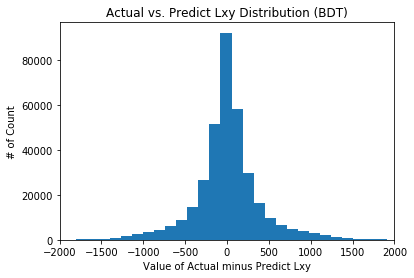

In [103]:
PredictLxyBDT = regressor.predict(Set2.drop(columns = ['Lxy']))
fig, ax = plt.subplots(1, 1)
ax.hist(Set2['Lxy']-PredictLxyBDT,1000)
plt.xlim(-2000,2000)
plt.title("Actual vs. Predict Lxy Distribution (BDT)")
plt.xlabel('Value of Actual minus Predict Lxy')
plt.ylabel('# of Count')

The predicted Lxy and actual Lxy of set 2 were plotted in a 2D histogram to show that the prediction using a BDT was an accurate prediction. 

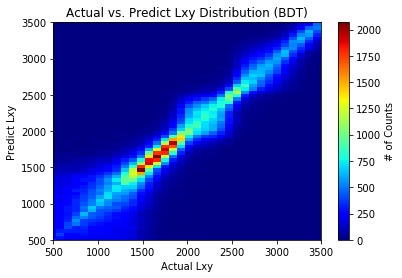

In [104]:
fig, ax = plt.subplots(1, 1)
plt.hist2d(Set2['Lxy'], PredictLxyBDT, bins=(1000, 1000), cmap=plt.cm.jet)
plt.xlim(500,3500)
plt.ylim(500,3500)
plt.title("Actual vs. Predict Lxy Distribution (BDT)")
plt.xlabel('Actual Lxy')
plt.ylabel('Predict Lxy')
cbar = plt.colorbar()
cbar.set_label('# of Counts')

Second, we train the Neural Networks.

The code in sklearn was used to create a neural networks and trained the neural networks with the data in Set 1.

In [105]:
mlp = MLPRegressor(hidden_layer_sizes = (10,5))
mlp.fit(Set1.drop(columns = ['Lxy']), Set1['Lxy'])

C:\Users\jeffj\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(10, 5), learning_rate='constant',
             learning_rate_init=0.001, max_iter=200, momentum=0.9,
             n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
             random_state=None, shuffle=True, solver='adam', tol=0.0001,
             validation_fraction=0.1, verbose=False, warm_start=False)

The neural networks was used to generate the prediction for the Lxy of Set 2. The difference between the actual and the predicted Lxy of Set 2 was plotted in the histogram. 

Text(0, 0.5, '# of Count')

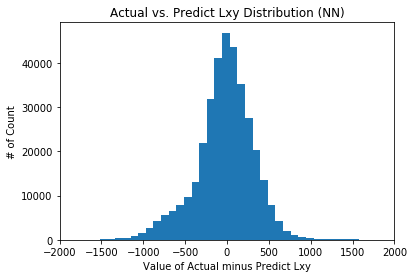

In [106]:
PredictLxyNN = mlp.predict(Set2.drop(columns = ['Lxy']))
fig, ax = plt.subplots(1, 1)
ax.hist(Set2['Lxy']-PredictLxyNN,1000)
plt.xlim(-2000,2000)
plt.title("Actual vs. Predict Lxy Distribution (NN)")
plt.xlabel('Value of Actual minus Predict Lxy')
plt.ylabel('# of Count')

The predicted Lxy and actual Lxy of set 2 were plotted in a 2D histogram to show that the prediction using a NN was an accurate prediction. 

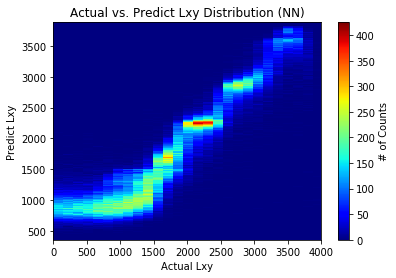

In [107]:
fig, ax = plt.subplots(1, 1)
plt.hist2d(Set2['Lxy'], PredictLxyNN, bins=(600, 600), cmap=plt.cm.jet)
plt.xlim(0,4000)
plt.title("Actual vs. Predict Lxy Distribution (NN)")
plt.xlabel('Actual Lxy')
plt.ylabel('Predict Lxy')
cbar = plt.colorbar()
cbar.set_label('# of Counts')

Between two ML, I think the NN was a better algorithm. Form the histogram below we can see the range of difference between actual and predicted of Lxy. The NN’s prediction range is smaller than the BDT's prediction range. That is the reason why I think NN is a better algorithm than BDT.

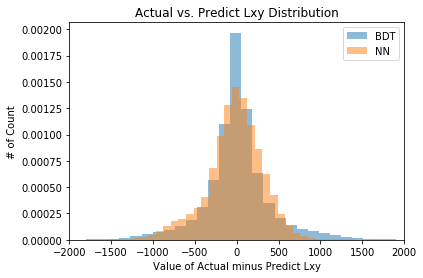

In [108]:
fig, ax = plt.subplots(1, 1)
ax.hist(Set2['Lxy']-PredictLxyBDT,1000,label='BDT',density = True, alpha=0.5)
ax.hist(Set2['Lxy']-PredictLxyNN,1000,label='NN',density = True, alpha=0.5)
plt.xlim(-2000,2000)
plt.title("Actual vs. Predict Lxy Distribution")
plt.xlabel('Value of Actual minus Predict Lxy')
plt.ylabel('# of Count')
plt.legend()

We run BDT regression and NN regression on IsLLP=false jets. The histogram shows that the prediction of BDT tends to evenly distributed from 0 to 3500 and NN tends to have a mean around 750. In this case, the NN has better predictions since the mean of NN is closer to 0. 

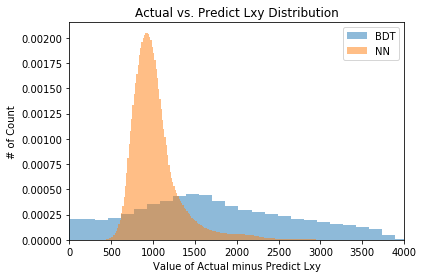

In [109]:
NotLLP = FramesWithLxy[(FramesWithLxy['IsLLP'] != True)].drop(columns = ['IsLLP'])
NotLLPLxyBDT = regressor.predict(NotLLP.drop(columns = ['Lxy']))
NotLLPLxyNN = mlp.predict(NotLLP.drop(columns = ['Lxy']))
fig, ax = plt.subplots(1, 1)
ax.hist(PredictLxyBDT,300, density=True, alpha=0.5,label='BDT')
ax.hist(NotLLPLxyNN,300, density=True, alpha=0.5,label='NN')
plt.xlim(0,4000)
plt.title("Actual vs. Predict Lxy Distribution")
plt.xlabel('Value of Actual minus Predict Lxy')
plt.ylabel('# of Count')
plt.legend()

In the end, we run the training for BDT again but include some of the LLP=false jets.

The LLP and 5000 non-LLP are combined into one set of data. 

In [110]:
SomeNotLLP = pd.concat([LLP, NotLLP.iloc[0:5000]],sort=True)

The data was split into two sets of data, Set 3 and Set 4.

In [111]:
Set3 = SomeNotLLP.iloc[::2]
Set4 = SomeNotLLP.iloc[1::2]

The code in sklearn was used to create a boosted decision tree and trained the decision tree with the data in Set 3.

In [112]:
regressor1 = DecisionTreeRegressor()
regressor1.fit(Set3.drop(columns = ['Lxy']), Set3['Lxy'])

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

The decision tree was used to generate the prediction for the Lxy of Set 4. The difference between the actual and the predicted Lxy of Set 4 was plotted in the histogram. 

Text(0, 0.5, '# of Count')

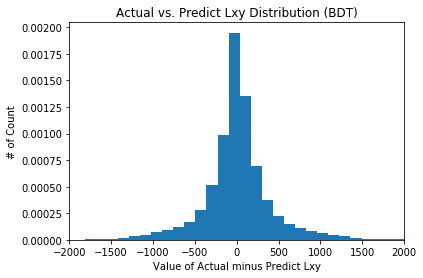

In [113]:
PredictSet4 = regressor1.predict(Set4.drop(columns = ['Lxy']))
fig, ax = plt.subplots(1, 1)
ax.hist(Set4['Lxy']-PredictSet4,1000, density=True)
plt.xlim(-2000,2000)
plt.title("Actual vs. Predict Lxy Distribution (BDT)")
plt.xlabel('Value of Actual minus Predict Lxy')
plt.ylabel('# of Count')

The predicted Lxy and actual Lxy of set 4 were plotted in a 2D histogram to show that the prediction using a BDT was an accurate prediction. Since the jet with 0 Lxy has the most count.

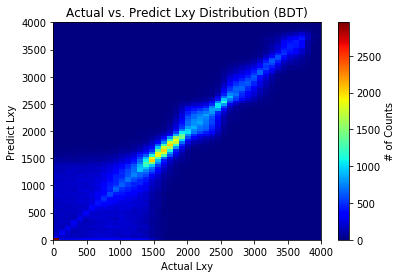

In [114]:
fig, ax = plt.subplots(1, 1)
x=Set4['Lxy']
y=PredictSet4
plt.hist2d(x, y, bins=(1000, 1000), cmap=plt.cm.jet)
plt.xlim(0,4000)
plt.ylim(0,4000)
plt.title("Actual vs. Predict Lxy Distribution (BDT)")
plt.xlabel('Actual Lxy')
plt.ylabel('Predict Lxy')
cbar = plt.colorbar()
cbar.set_label('# of Counts')

Since I add 5000 of 0 Lxy into the data and split the data into two sets of data. each set should have 2500 of 0 Lxy. 

In [115]:
x1 = x[x==0]
y1 = y[y==0]
print('number of 0 Lxy in actual set 4:', len(x1))
print('number of 0 Lxy in predicted set 4:', len(y1))

number of 0 Lxy in actual set 4: 2500
number of 0 Lxy in predicted set 4: 4667


As shown above there is a lot more 0 Lxy in predicted set 4.